# Imports

In [1]:
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from scipy.linalg import svd
import sklearn.cluster as cluster
import plotly.express as px
import plotly.graph_objects as go

np.random.seed(1234)

In [2]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
# mpl.rcParams.update({"axes.grid": True})

# Quiz Notes

1 the forecasting problem

# 10.1 Intro to Time-Series Forecasting

Applicable when data admit a time parameter, i.e. they are presented in a sequential manner. Examples:  
- Econometrics - gdp, inflation rates
- Business - forecasting demand and commodity prices

Defining property of time series: **sequential**

2 key models:
- Decomposition
- Autoregressive moving average (ARMA)


# 10.2 Differences in time series data

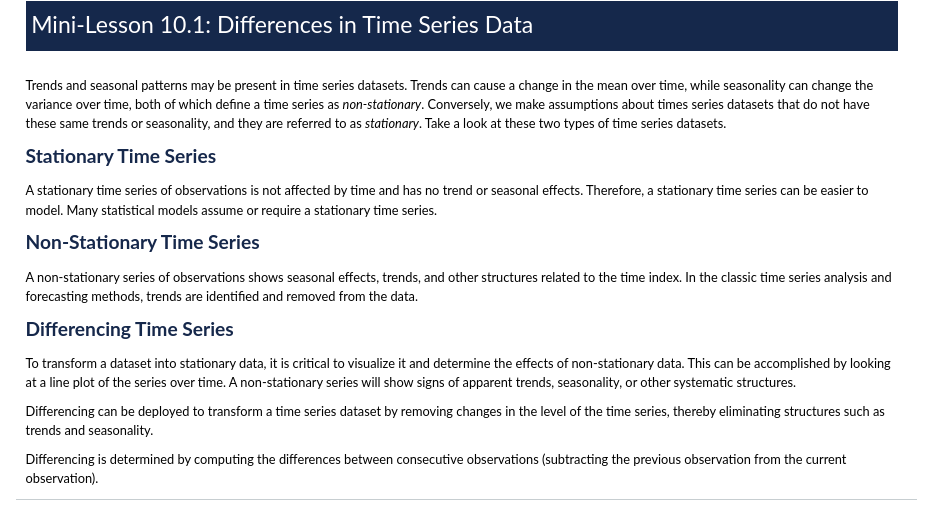

# 10.2 Time-Series Problem Statement

Given historical data, try to predict what will happen over some future time window

Comment on time - methods do not depend on duration of time step (delta t), only on the amount of data available, example
- Make 10-year prediction with 100 years of data, --or--
- Make 10-second prediction with 100 seconds of data
- because same total amount of data

## Example graphic

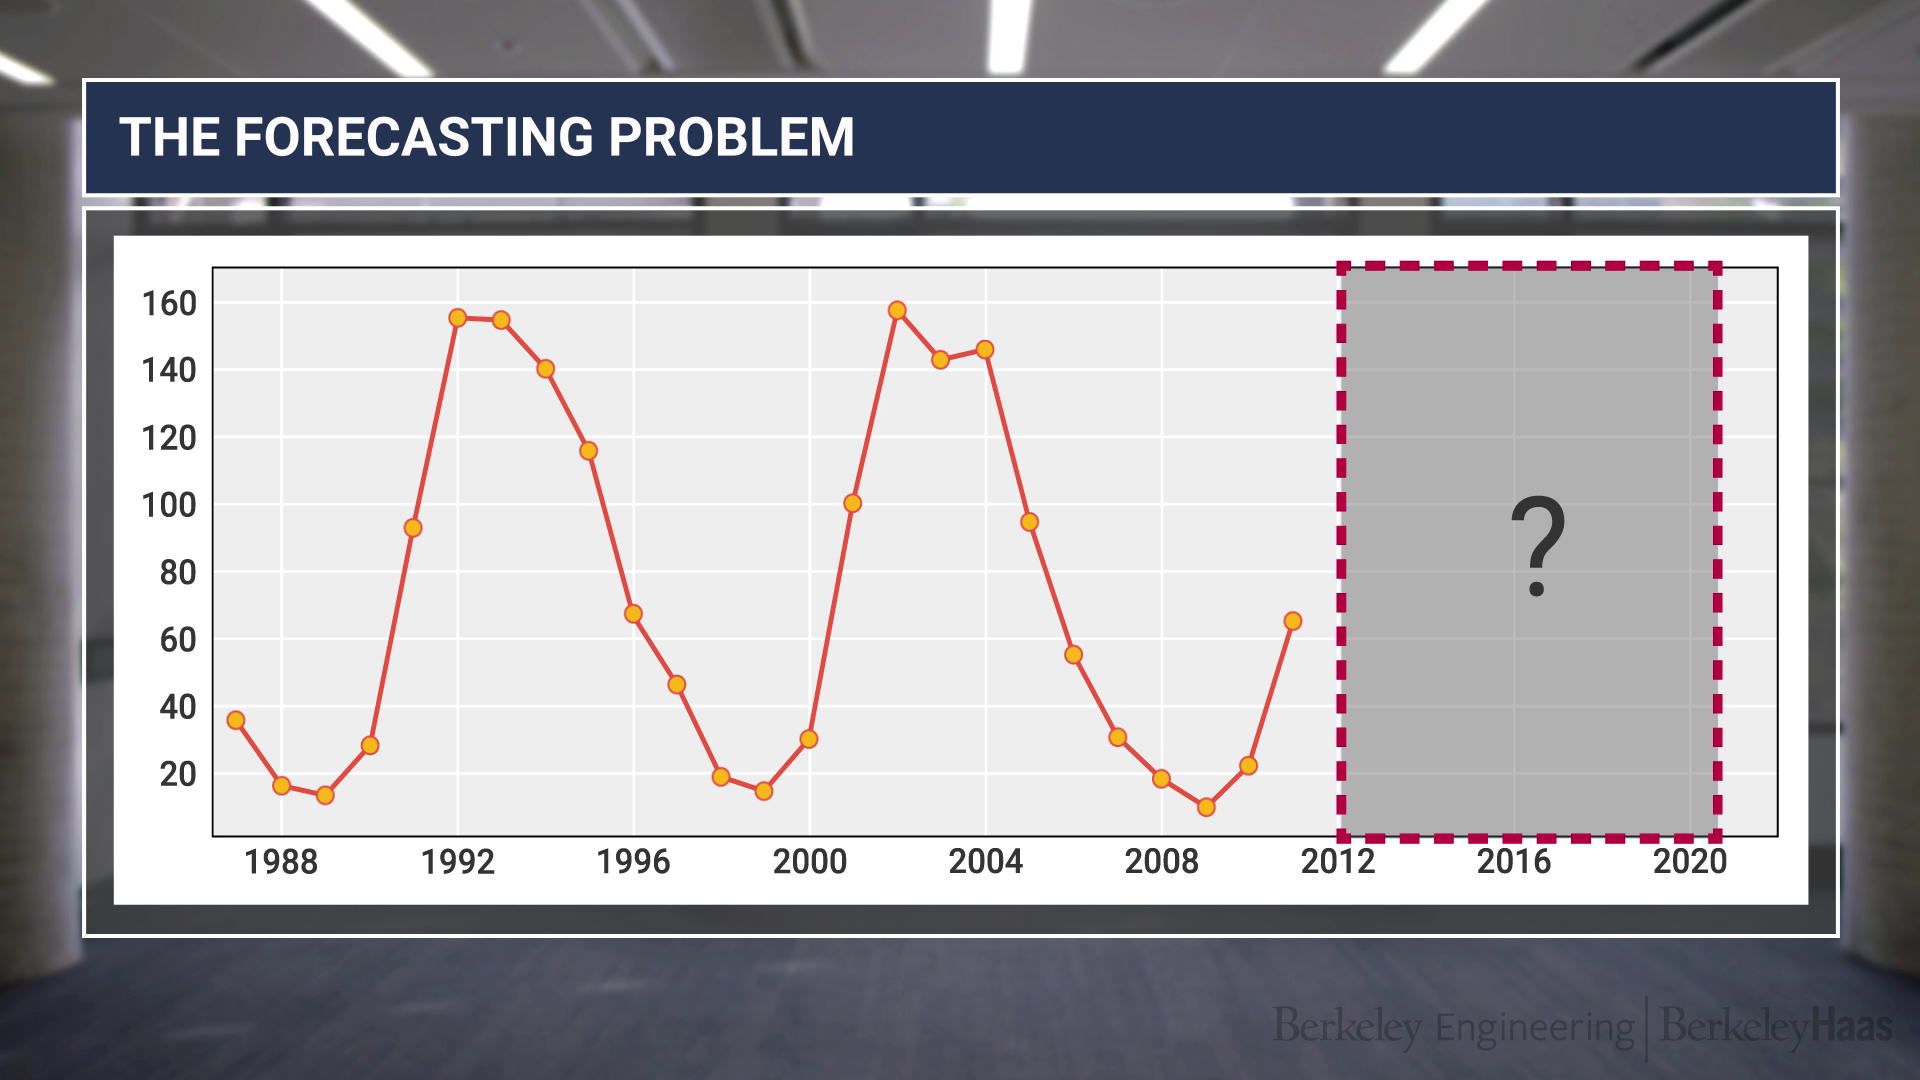

## Steps of forecasting

Four steps:
- Collect historical data
- Train a model
- Use model to make forecast
- Score model - evaluate performance of model once time horizon is past (i.e. truth becomes available)

## Terminology Defined

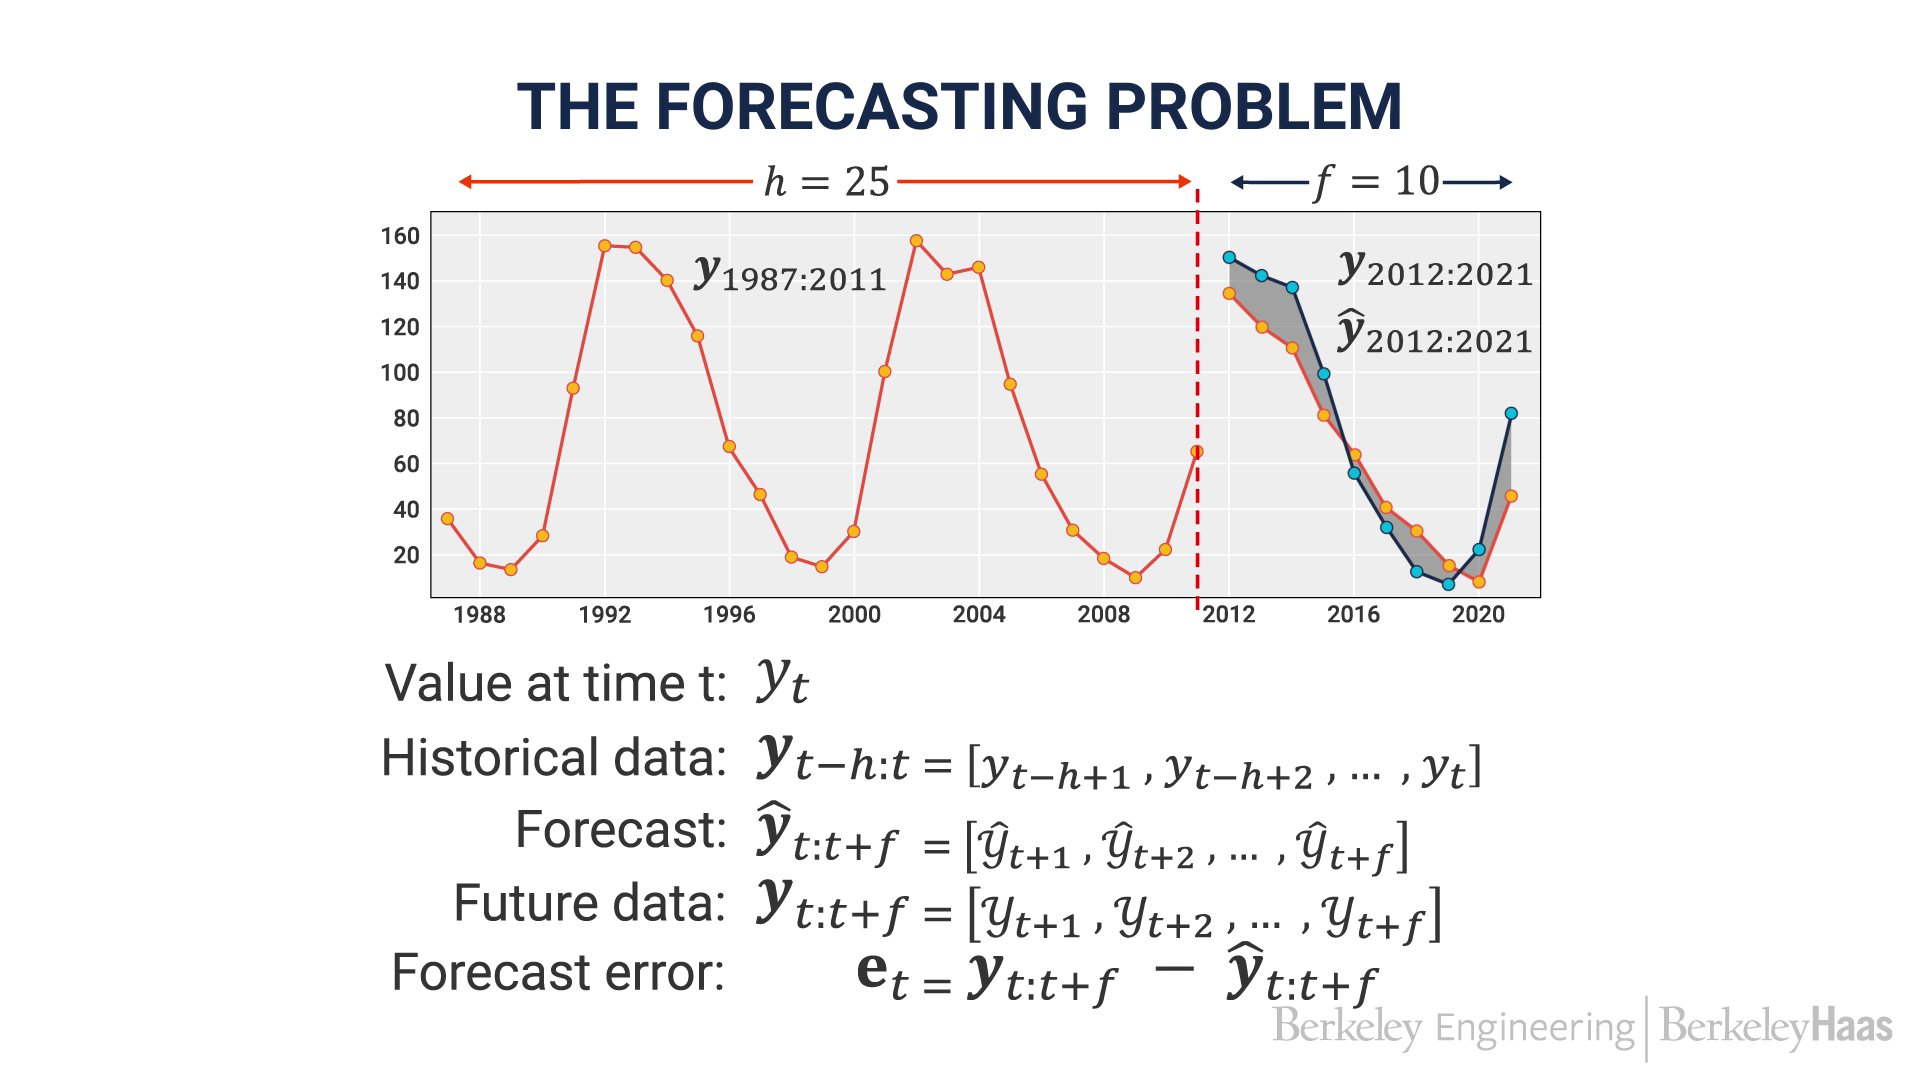

## How to Compress Errors into a Single Value?

2 common choices:
- MAE - mean absolute error - sum of abs of errors
- RMSE - root mean square - square root of sum of squared errors

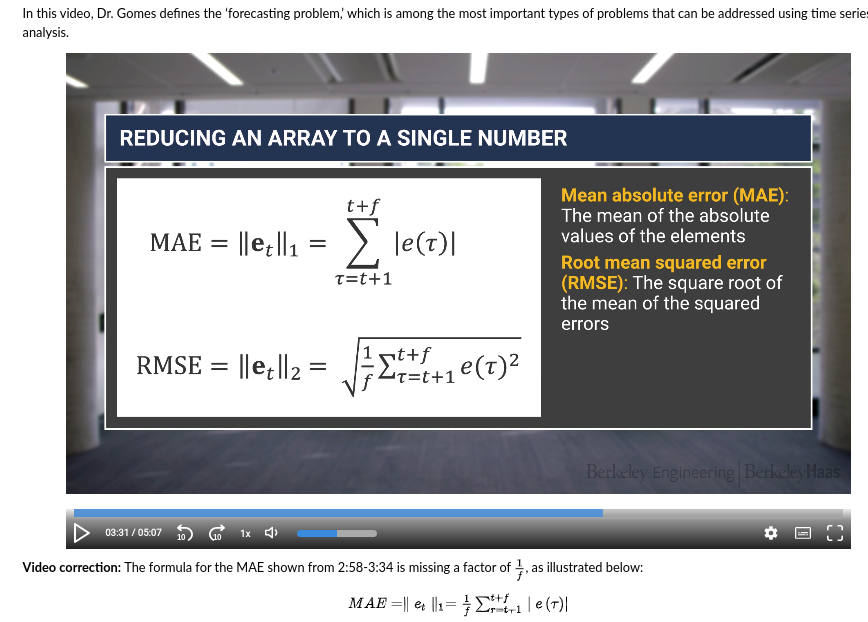

## Forecasting model

Any equation or algorithm that generates forecasts from historical data

# 10.3 Modeling Part 1

Thus far we have described data as having been generated by an unseen PDF, and task had been to infer something about the (unknown) PDF from the data  

Here again same approach, except random variables are organized in a sequential manner, giving rise to a *stochastic process*:
- Stochastic = ordered sequence of random variables
    - n.b.: a **sequence** of random variables
    - whereas a *time series* is a *single sample* from a stochastic process

## 2 key properties of sp

### Stationarity
- Key statistical properties are constant over time
    - Mean, variance, yada yada yada
    - Such that if you focus on a time window of any size, stats are same no matter where window is
    - e.g. if you get a window a "time 1", same distribution as if all time
    - Marginal distribution is Yt on picture

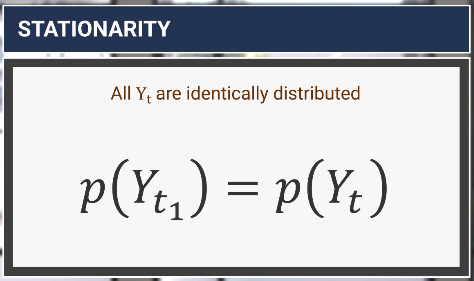


### Independence

Joint probability is product of marginal probabilities. Note here that subscript t is different random variables. Not time?!

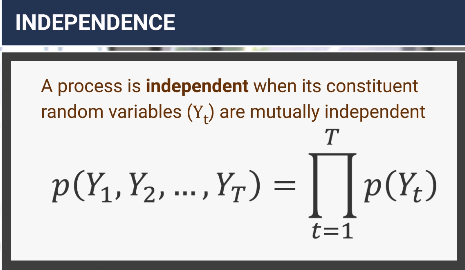

#### Independence of Future on past

Say a future outcome is not influenced by prior outcomes, then prediction now given past same as prediction now

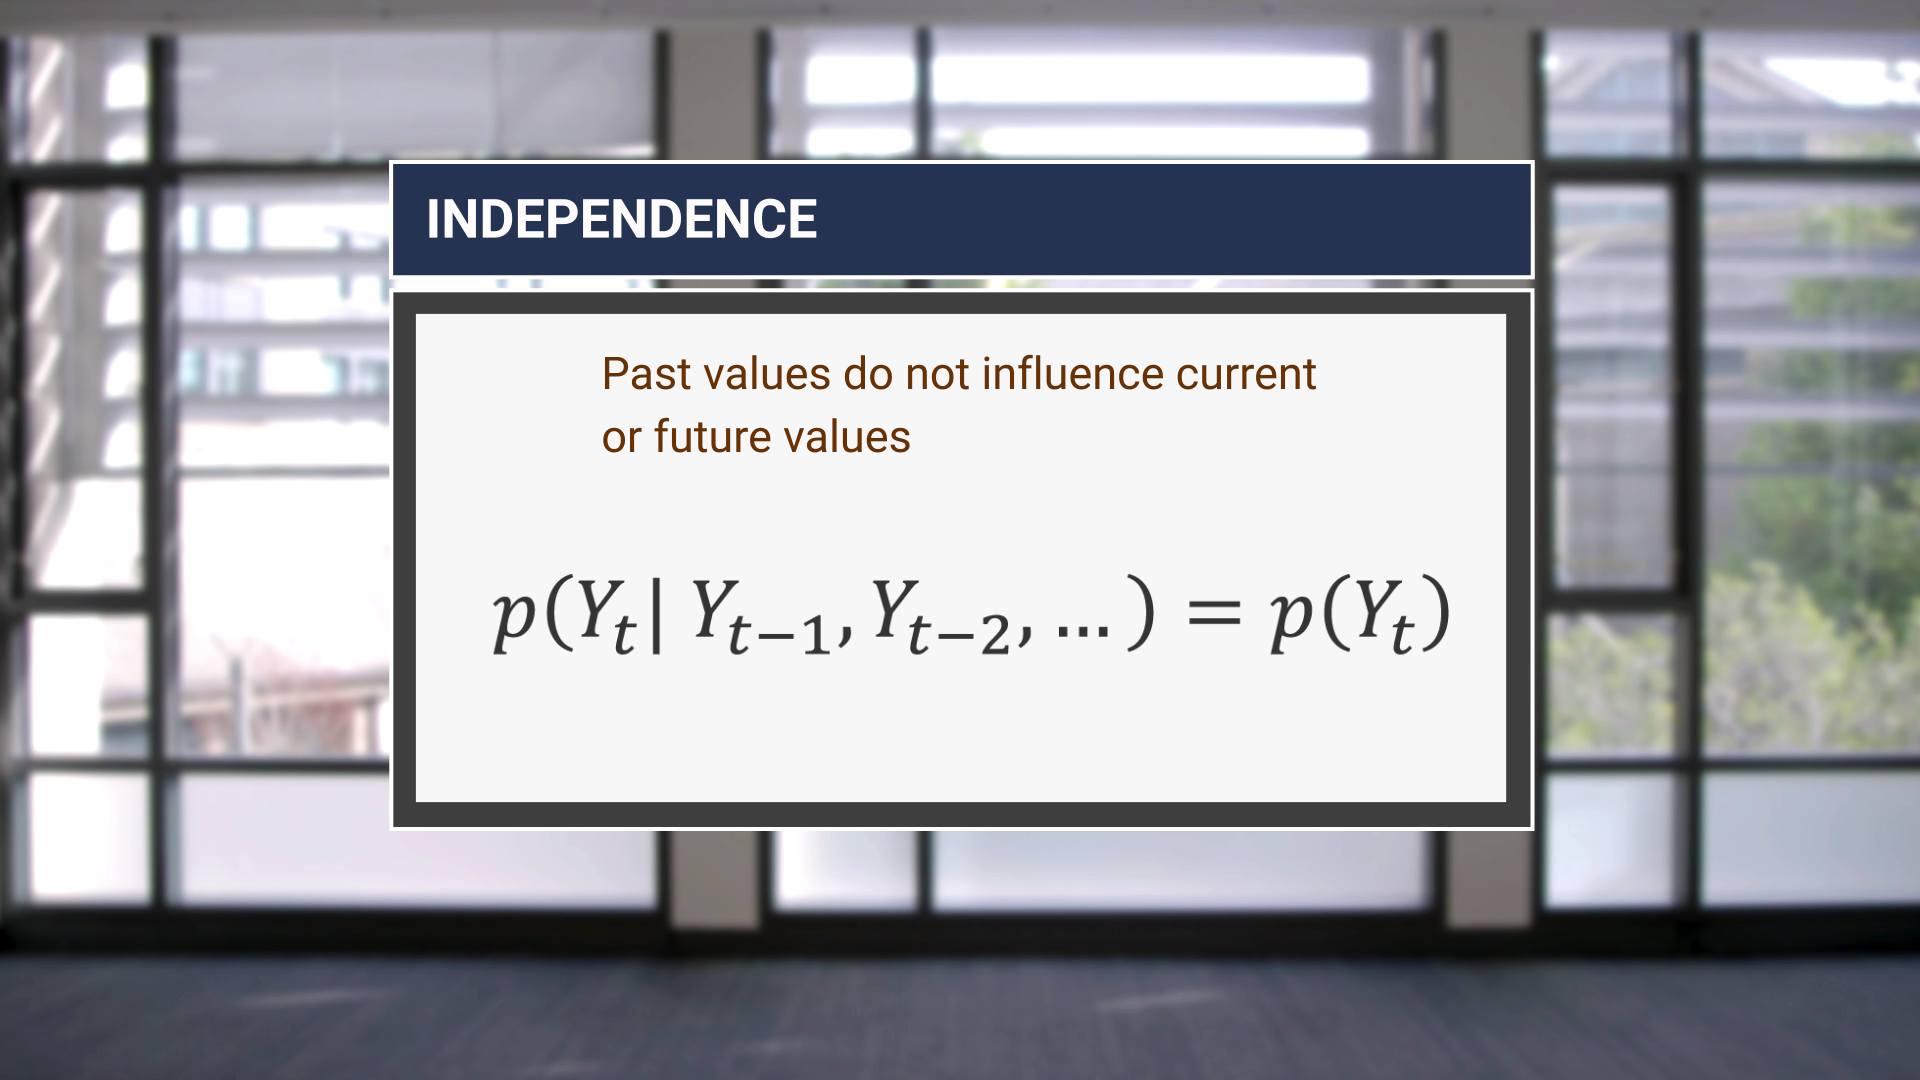

## IID

Processes can be stationary, independent, or stationary and independent
- Independent and identically distributed (IID) is stationary and independent
- Process can also be neither stationary nor independent

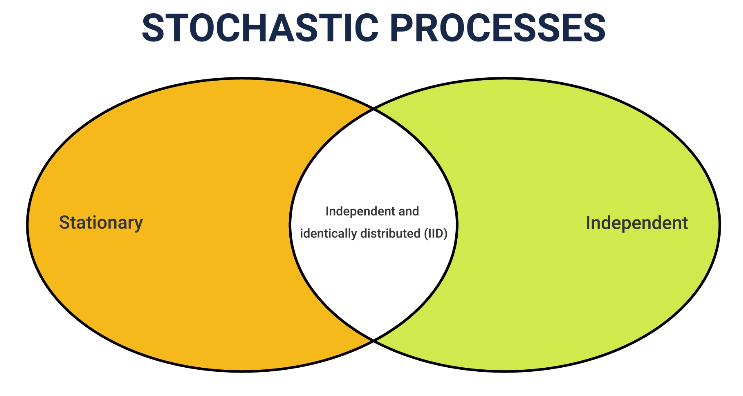

## Special example of IID - Gaussian white noise

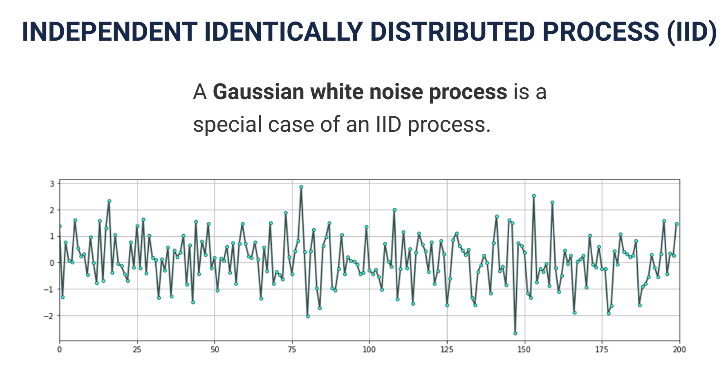

# 10.4 Modeling Part 2

## Autocorrelation Matrix

Key step in estimating correlations between pairs of random variables. Organize into autocorrelation matrix to determine stationarity

As you move out on diagonals, you move the time distance between variable you are estimating
- First diagonal, one time step (see highlighted boxes in picture)
- Second diagonal, second time step
- etc...
- So number of time steps is the unsigned difference between the subscripts

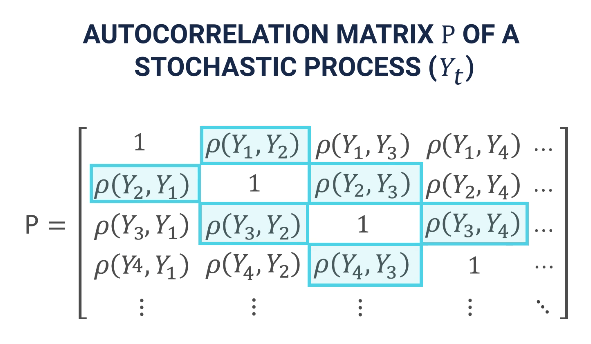

## For a stationary matrix

Stats of any window data the same. So the r1's in the matrix below are all dt = 1, and if stationary then all the same. That is the ACF at time lag = 1.

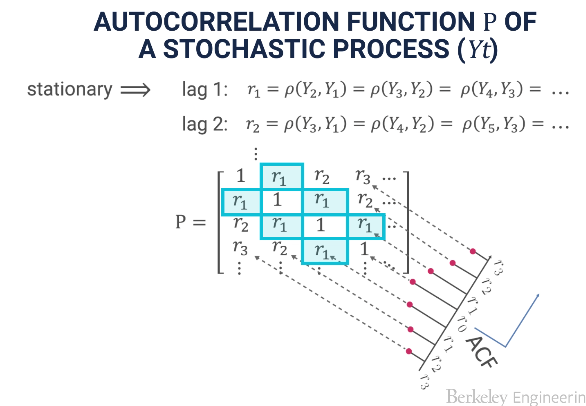

## About the ACF

Tends to decay with lag, meaning data more similar to recent time samples than later ones
- But not always

Can also compute the *sample* autocorrelation function

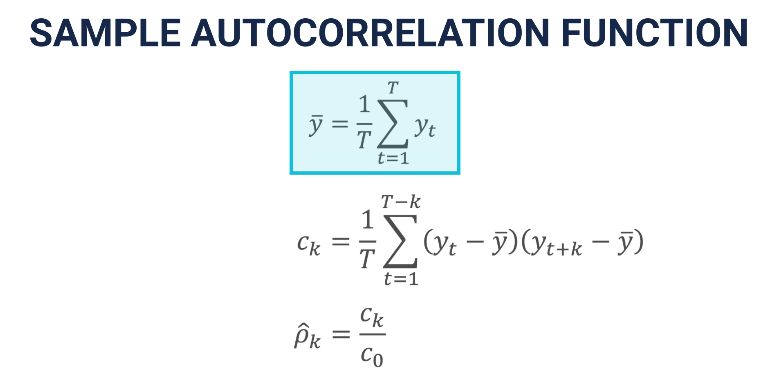

## Some Example ACF's

### Gaussian White Noise (Stationary)

3 plots:
- 1 actual ACF of a white noise process
    - All but lag 0 are 0 becase stationary process
- 2 time sample from this process
- 3 sample ACF
    - Lag 0 again 0 (not surprising since formula with make this true)
    - Remaining samples are close to 0
    - Shaded box shows threshold inside of which regard as 0
    - Height of this box decreases with length of time sample

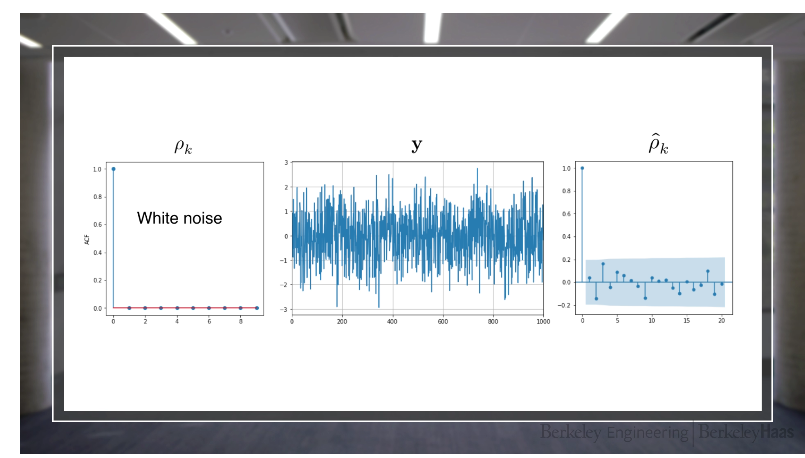

### Non-Stationary

Notice peaking at lag = 10, and time sample shows periodicity of about 10 samples

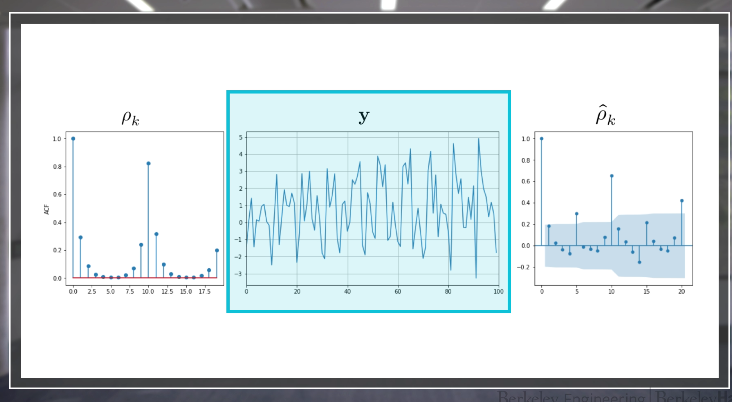